### Import Lib and Data

In [163]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

In [164]:
data = pd.read_csv('Andhra_Pradesh.csv')

In [165]:
data.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,Achanta,56,SATYANARAYANA PITHANI,Telugu Desam,CHERUKUVADA SRI RANGANADHA RAJU,Yuvajana Sramika Rythu Congress Party,26554,Result Declared
1,Addanki,105,GOTTIPATI RAVI KUMAR,Telugu Desam,CHINNA HANIMIREDDY PANEM,Yuvajana Sramika Rythu Congress Party,24890,Result Declared
2,Adoni,146,DR. PARTHA SARATHI VALMIKI,Bharatiya Janata Party,Y. SAI PRASAD REDDY,Yuvajana Sramika Rythu Congress Party,18164,Result Declared
3,Allagadda,134,AKHILA PRIYA BHUMA,Telugu Desam,BRIJENDRA REDDY GANGULA (NANI),Yuvajana Sramika Rythu Congress Party,12037,Result Declared
4,Alur,147,B. VIRUPAKSHI,Yuvajana Sramika Rythu Congress Party,B. VEERABHADRA GOWD,Telugu Desam,2831,Result Declared
5,Amadalavalasa,6,KOONA RAVI KUMAR,Telugu Desam,THAMMINENI SEETARAM,Yuvajana Sramika Rythu Congress Party,35032,Result Declared
6,Amalapuram,44,AITHABATHULA ANANDARAO,Telugu Desam,VISWARUPU PINIPE,Yuvajana Sramika Rythu Congress Party,38628,Result Declared
7,Anakapalle,30,KONATHALA RAMAKRISHNA,Janasena Party,BHARATH KUMAR MALASALA,Yuvajana Sramika Rythu Congress Party,65764,Result Declared
8,Anantapur Urban,153,DAGGUPATI PRASAD,Telugu Desam,ANANTHA VENKATARAMI REDDY,Yuvajana Sramika Rythu Congress Party,23023,Result Declared
9,Anaparthy,40,RAMAKRISHNA REDDY NALLAMILLI,Bharatiya Janata Party,DOCTOR.SATHI SURYANARAYANA REDDY,Yuvajana Sramika Rythu Congress Party,20850,Result Declared


In [166]:
print(data.shape)
data.tail(10)

(175, 8)


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
165,Vijayawada West,79,YALAMANCHILI SATYANARAYANA CHOWDARY (SUJANA CH...,Bharatiya Janata Party,ASIF SHAIK,Yuvajana Sramika Rythu Congress Party,47032,Result Declared
166,Vinukonda,99,GONUGUNTLA VENKATA SIVA SITA RAMA ANZANNEYLLU,Telugu Desam,BOLLA BRAHMA NAIDU,Yuvajana Sramika Rythu Congress Party,30267,Result Declared
167,Visakhapatnam East,21,RAMAKRISHNA BABU VELAGAPUDI,Telugu Desam,M V V SATYANARAYANA,Yuvajana Sramika Rythu Congress Party,70877,Result Declared
168,Visakhapatnam North,23,VISHNU KUMAR RAJU PENMETSA,Bharatiya Janata Party,KANNAPARAJU KAMMILA (K.K. RAJU),Yuvajana Sramika Rythu Congress Party,47534,Result Declared
169,Visakhapatnam South,22,CH.VAMSI KRISHNA SRINIVAS,Janasena Party,GANESH KUMAR VASUPALLI,Yuvajana Sramika Rythu Congress Party,64594,Result Declared
170,Visakhapatnam West,24,P.G.V.R.NAIDU(GANABABU),Telugu Desam,ADARI ANAND KUMAR,Yuvajana Sramika Rythu Congress Party,35184,Result Declared
171,Vizianagaram,18,ADITI VIJAYALAKSHMI GAJAPATHI RAJU PUSAPATI,Telugu Desam,KOLAGATLA VEERABHADRA SWAMY,Yuvajana Sramika Rythu Congress Party,60609,Result Declared
172,Yelamanchili,32,SUNDARAPU VIJAY KUMAR,Janasena Party,UPPALAPATI VENKATA RAMANAMURTHY RAJU,Yuvajana Sramika Rythu Congress Party,48956,Result Declared
173,Yemmiganur,144,B. JAYANAGESWARA REDDY,Telugu Desam,BUTTA RENUKA,Yuvajana Sramika Rythu Congress Party,15837,Result Declared
174,Yerragondapalem (SC),102,CHANDRA SEKHAR TATIPARTHI,Yuvajana Sramika Rythu Congress Party,ERIXION BABU GUDURI,Telugu Desam,5200,Result Declared


### Max and Min Margin

In [167]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')
max_margin = data.loc[data['Margin'].idxmax()]
min_margin = data.loc[data['Margin'].idxmin()]

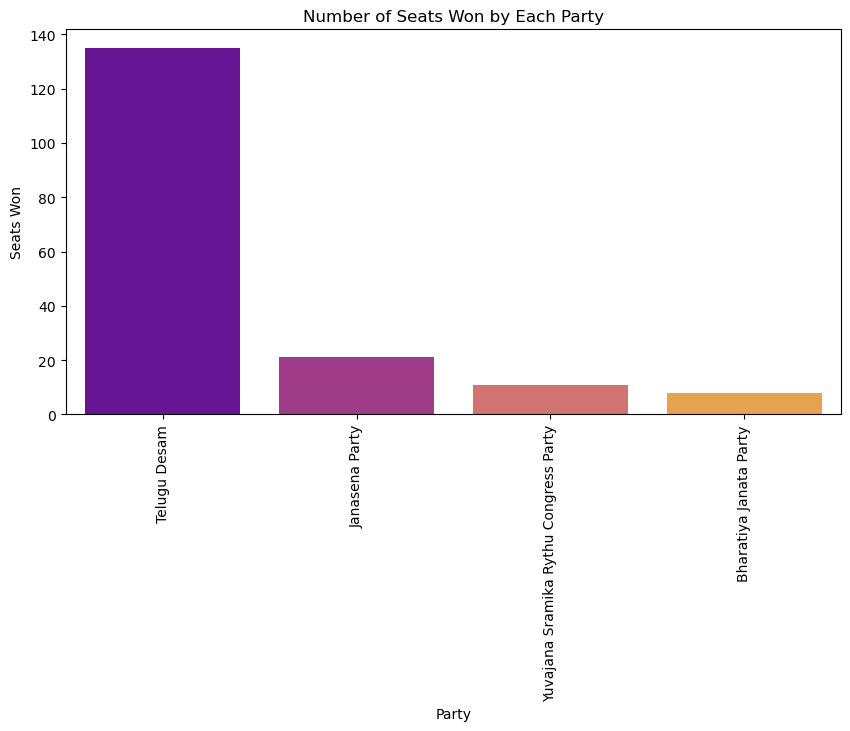

In [168]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()

seats_won = data['Leading Party'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='plasma')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

### Vote Distribution between Candidates

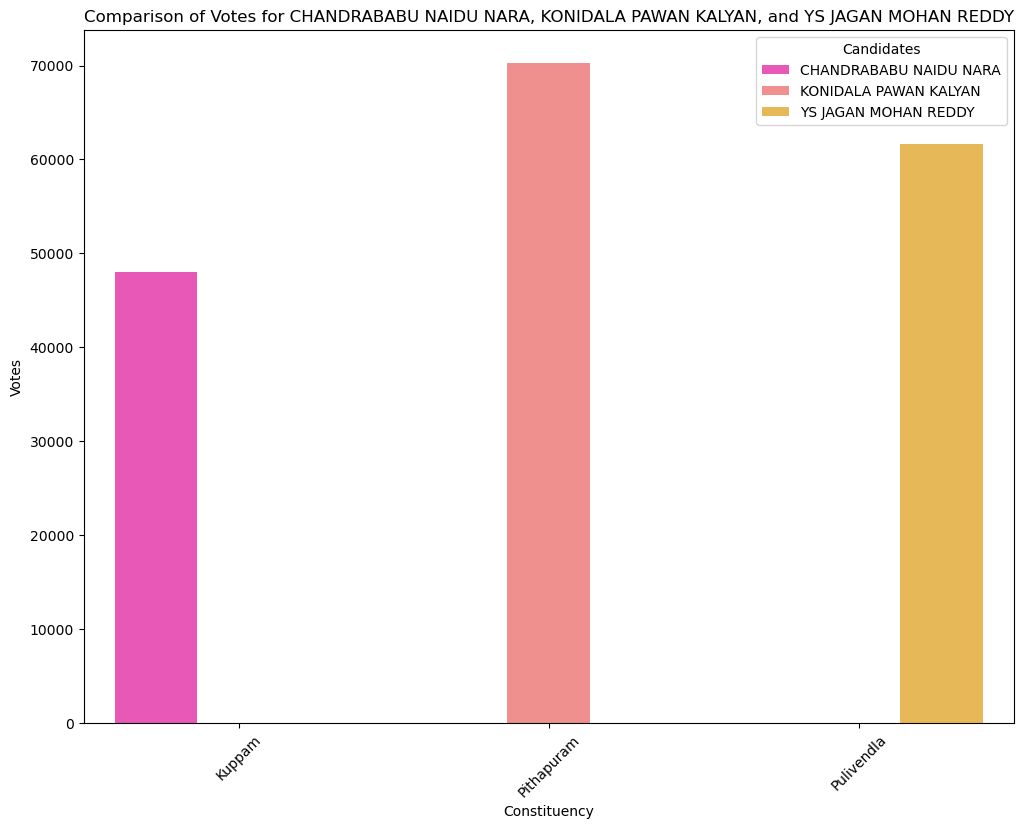

In [169]:
chandrababu_entries = data[data['Leading Candidate'] == 'CHANDRABABU NAIDU NARA']
kalyan_entries = data[data['Leading Candidate'] == 'KONIDALA PAWAN KALYAN']
mohan_entries = data[data['Leading Candidate'] == 'YS JAGAN MOHAN REDDY']

chandrababu_votes = chandrababu_entries['Margin'].values
kalyan_votes = kalyan_entries['Margin'].values[0] if not kalyan_entries.empty else 0
mohan_votes = mohan_entries['Margin'].values[0] if not mohan_entries.empty else 0

chandrababu_constituencies = list(chandrababu_entries['Constituency'])

kalyan_constituency = kalyan_entries['Constituency'].values[0] if not kalyan_entries.empty else "Modi Constituency"

mohan_constituency = mohan_entries['Constituency'].values[0] if not mohan_entries.empty else "Amit Shah Constituency"

data_to_plot = pd.DataFrame({
    'Candidates': ['CHANDRABABU NAIDU NARA'] * len(chandrababu_votes) + ['KONIDALA PAWAN KALYAN', 'YS JAGAN MOHAN REDDY'],
    'Constituency': chandrababu_constituencies + [kalyan_constituency] + [mohan_constituency],
    'Votes': list(chandrababu_votes) + [kalyan_votes] + [mohan_votes]
})

plt.figure(figsize=(12, 9))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidates', palette='spring')
plt.title('Comparison of Votes for CHANDRABABU NAIDU NARA, KONIDALA PAWAN KALYAN, and YS JAGAN MOHAN REDDY')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

### Min - Max Margin Candidate

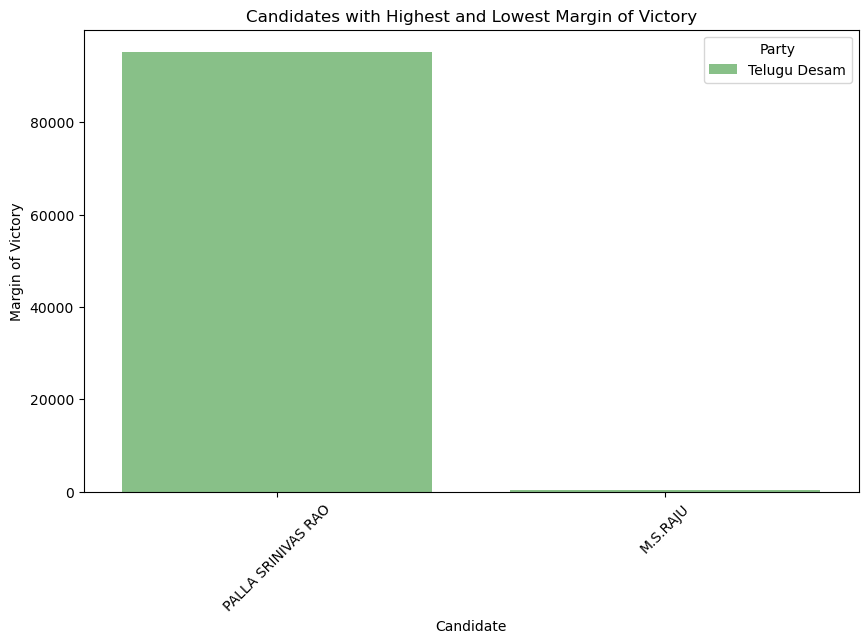

In [170]:
data_to_plot = pd.DataFrame({
    'Candidate': [max_margin['Leading Candidate'], min_margin['Leading Candidate']],
    'Party': [max_margin['Leading Party'], min_margin['Leading Party']],
    'Margin': [max_margin['Margin'], min_margin['Margin']]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=data_to_plot, x='Candidate', y='Margin', hue='Party', palette='Accent')
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


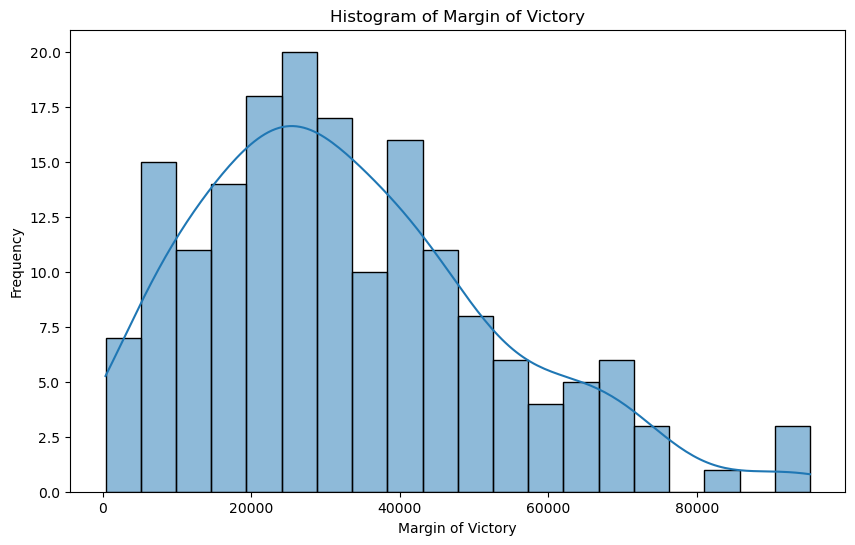

In [171]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Margin'], bins=20, kde=True)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

### Distribution Pie Chart

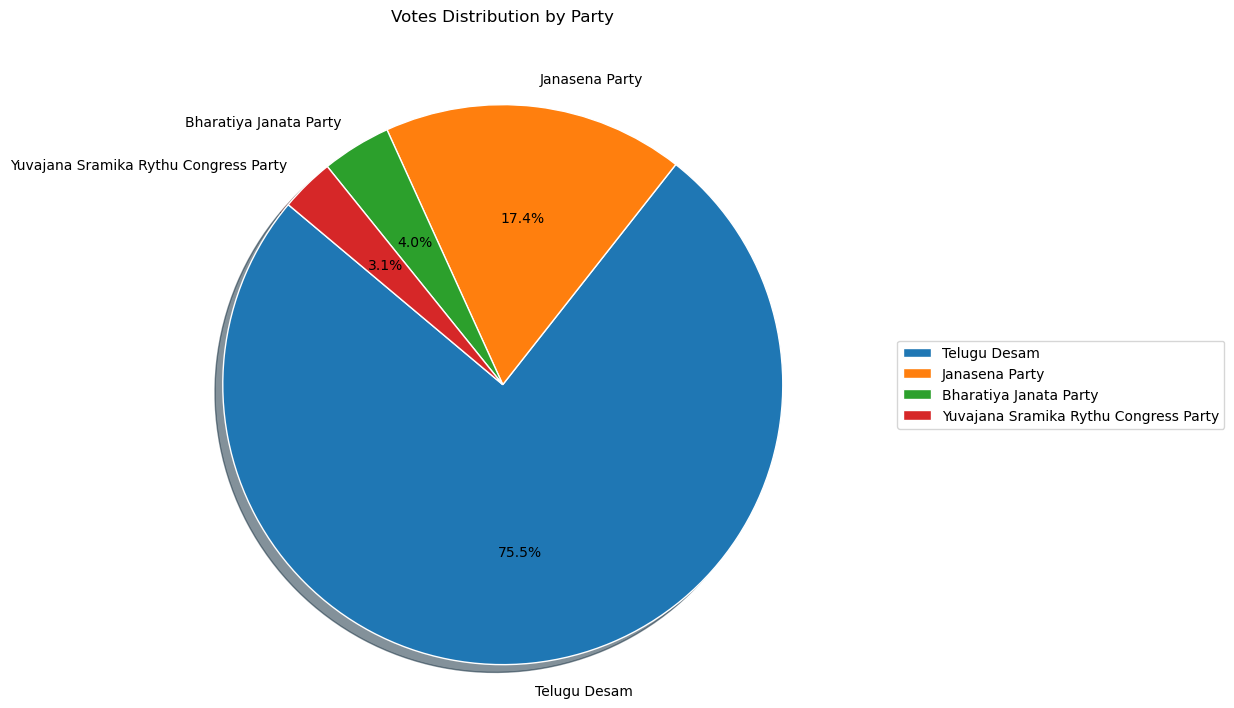

In [172]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 5)
# This can be used for having random slice colors for the pie chart if used as an argument in plt.pie()
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes,labels=party_votes.index, autopct='%1.1f%%', startangle=140,shadow = True, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=40)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

### Plot of Trailing Parties (Seats)

In [173]:
trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = data['Trailing Party'].value_counts()

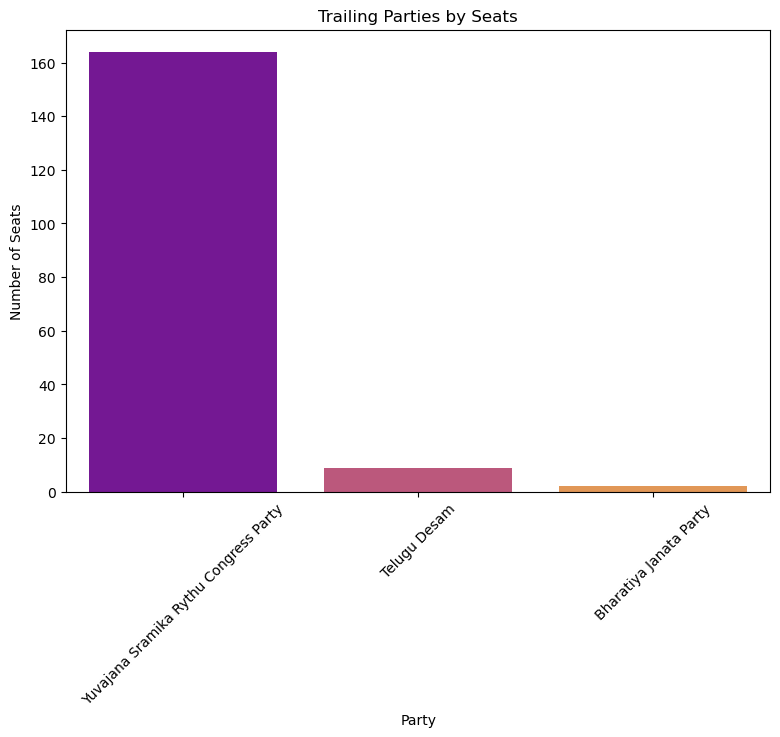

In [174]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=trailing_party_seats.index[:4], y=trailing_party_seats.values[:4], palette='plasma')
plt.title('Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.show()

### Plot of Trailing Parties (Votes)

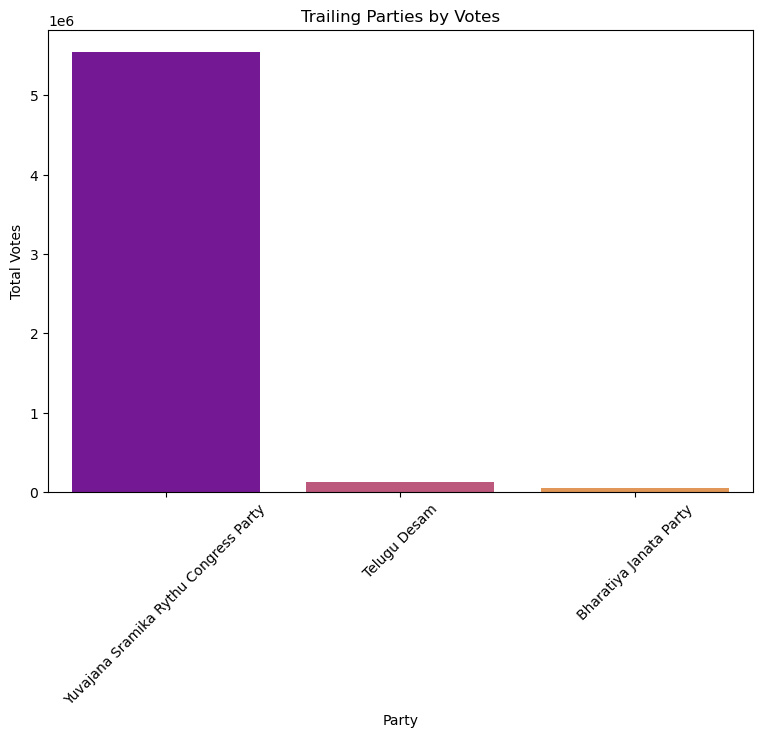

In [175]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:4], y=trailing_party_votes.values[:4], palette='plasma')
plt.title('Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()

### Plot of Leading Parties (Seats)

In [176]:
leading_party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
leading_party_seats = data['Leading Party'].value_counts()

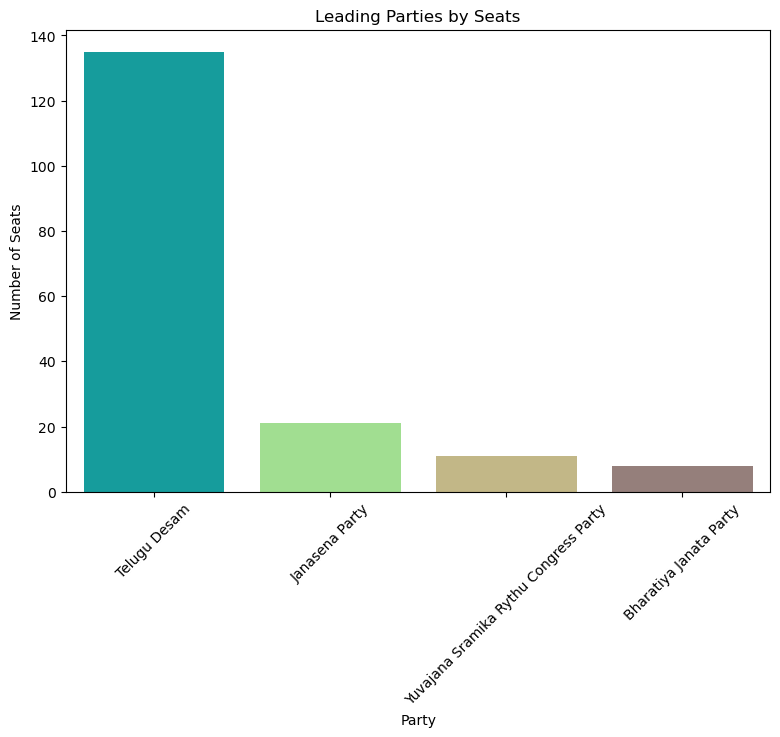

In [177]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=leading_party_seats.index[:4], y=leading_party_seats.values[:4], palette='terrain')
plt.title('Leading Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.show()

### Plot of Leading Parties (Votes)

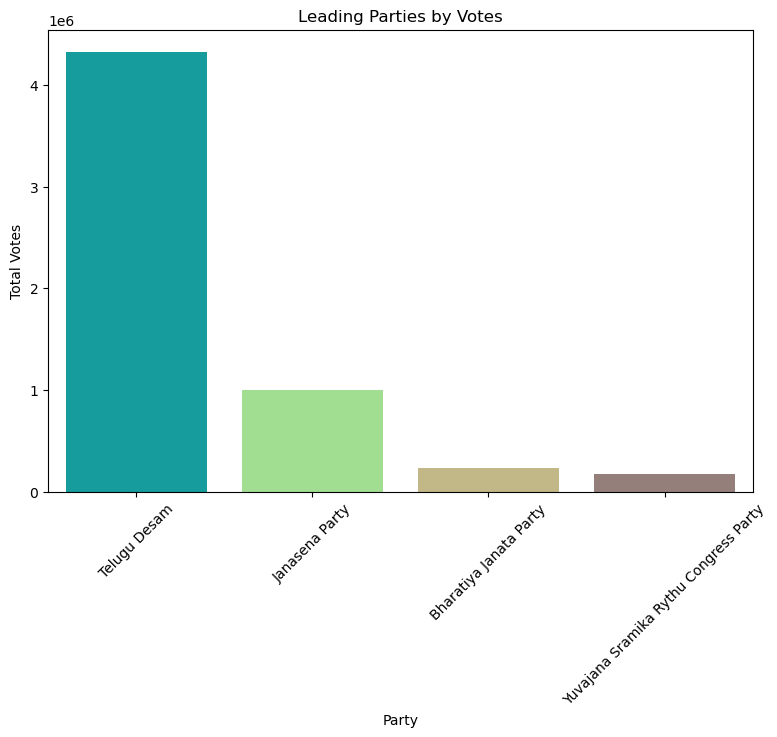

In [178]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=leading_party_votes.index[:4], y=leading_party_votes.values[:4], palette='terrain')
plt.title('Leading Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()